In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

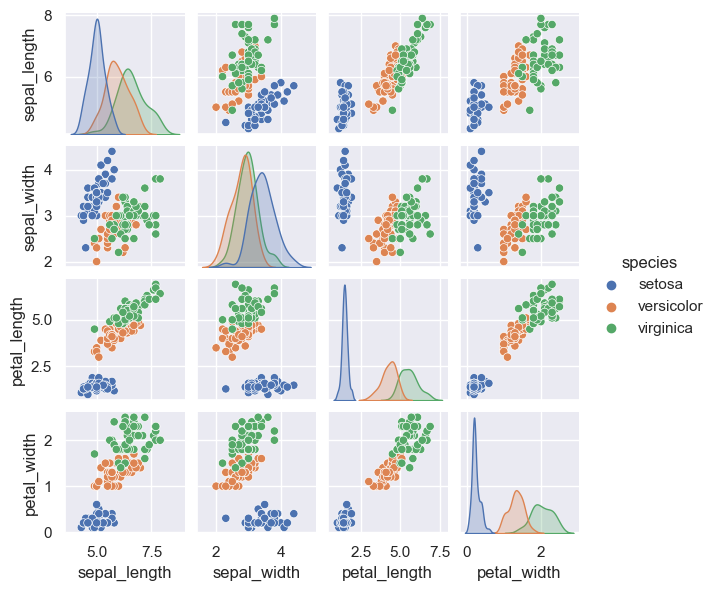

In [20]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [74]:
# простая линейная регрессия
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

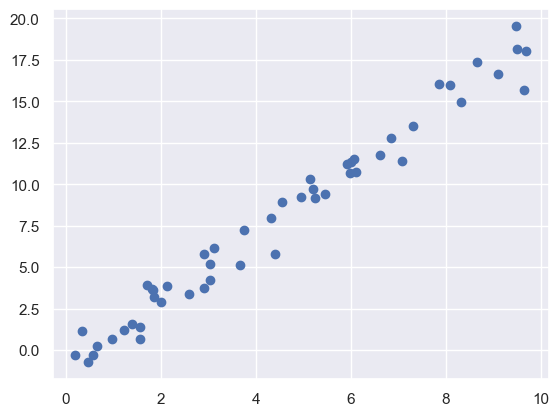

In [76]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [78]:
X = x[:, np.newaxis]
model.fit(X, y)

LinearRegression()

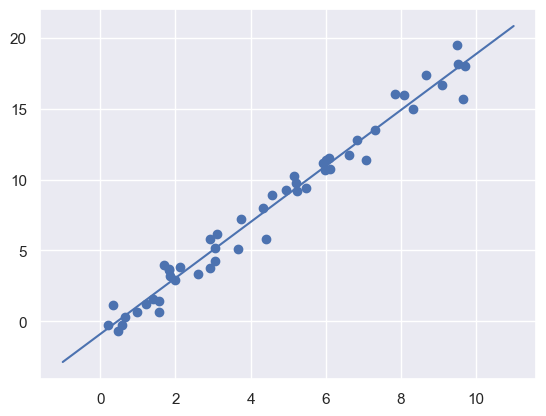

In [80]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [14]:
iris = sns.load_dataset('Iris')
x_iris = iris.drop('species', axis=1)
y_iris = iris.species
x_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
# классификация набора данных Iris
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_iris, y_iris, random_state=1)

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()  
model.fit(Xtrain, Ytrain)
y_model = model.predict(Xtest)
y_model

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, y_model)

0.9736842105263158

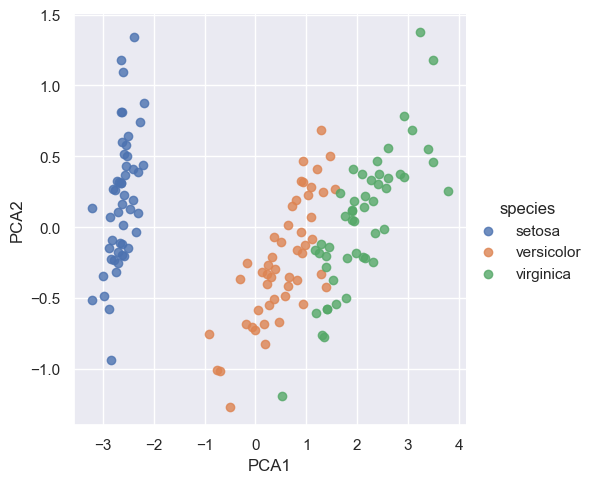

In [24]:
# понижение размерности набора данных Iris
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x_iris)
X_2D = model.transform(x_iris)
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

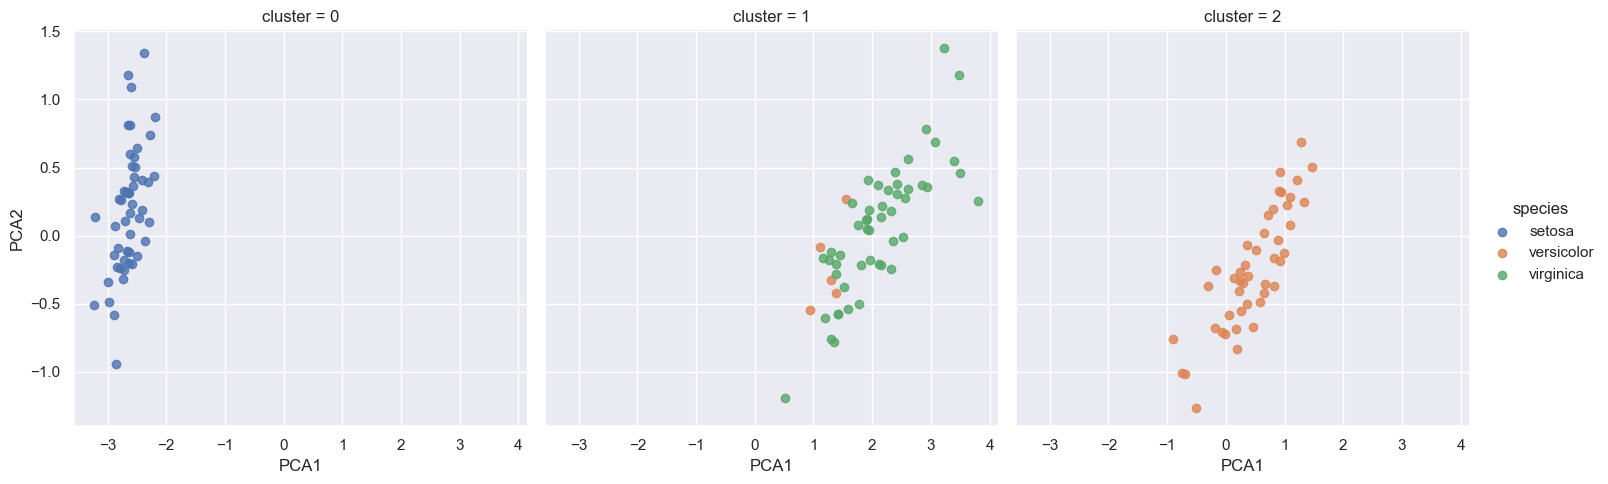

In [25]:
# кластеризация набора данных Iris
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

In [27]:
# анализ рукописных цифр
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Text(0.05, 0.05, '1')

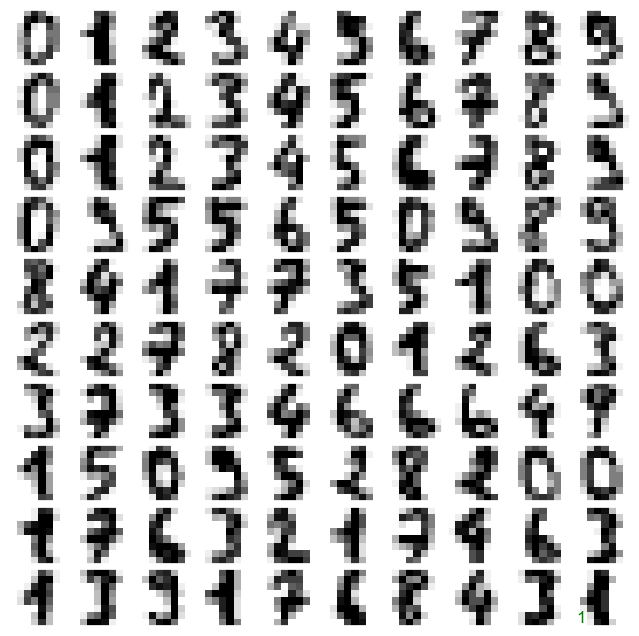

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    
ax.text(0.05, 0.05, str(digits.target[i]), 
        transform=ax.transAxes, color='green')

In [54]:
# понижение размерности
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/Users/nikitos/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/nikitos/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

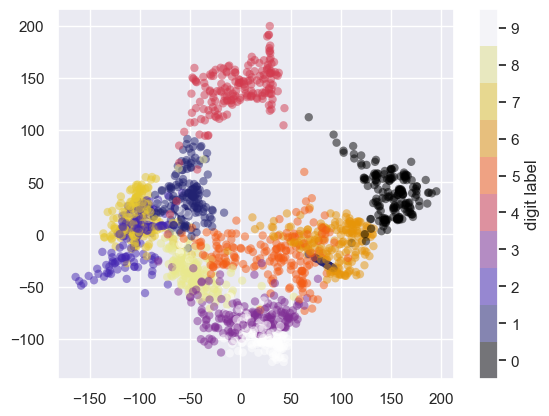

In [56]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
                    c=digits.target, edgecolor='none', alpha=0.5,
                    cmap=plt.cm.get_cmap('CMRmap', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [57]:
# классификация цифр
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [66]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(110.44999999999997, 0.5, 'true value')

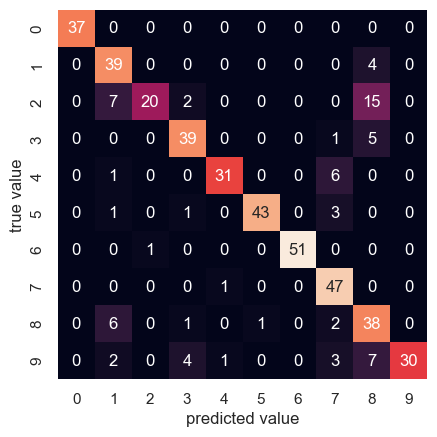

In [72]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') 
plt.ylabel('true value')

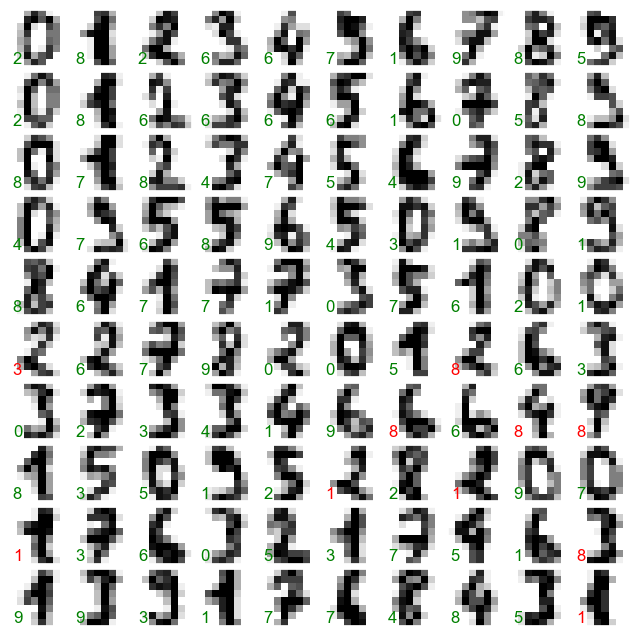

In [73]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes,
    color='green' if (ytest[i] == y_model[i]) else 'red')